# Distance measure
 * Euclidean Distance
 * Manhattan Distance
 * Minkowski Distance
 * Mahalanobis Distance
 

# Euclidean Distance

In [1]:
import numpy as np
x = np.array([1,2,3])
y = np.array([4,5,6])
dist = np.linalg.norm(x-y, axis=0)
print(dist)

5.196152422706632


In [2]:
x = np.array([1,2,3])
y = np.array([4,5,6])
dist = np.sqrt(np.sum((x-y)**2, axis=0))
print(dist)

5.196152422706632


In [3]:
from scipy.spatial import distance
x = (1, 2, 3)
y = (4, 5, 6)
dist = distance.euclidean(x, y) #Computes the Euclidean distance between two 1-D arrays
print(dist)

5.196152422706632


In [4]:
from math import dist
dist([1,2,3],[4,5,6])

5.196152422706632

In [5]:
#source : https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy/47542304#47542304, Nico Schlömer's answer
import numpy as np
import perfplot
from math import dist
from scipy.spatial import distance

def linalg_norm(data):
    a, b = data
    return np.linalg.norm(a - b, axis=1)

def sqrt_sum(data):
    a, b = data
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def scipy_dist(data):
    a, b = data
    return list(map(distance.euclidean, a, b))

def math_dist(data):
    a, b = data
    return list(map(dist, a, b))

def setup(n):
    a = np.random.rand(n, 3)
    b = np.random.rand(n, 3)
    return np.array([a, b])

result = perfplot.bench(
    setup=setup,
    n_range=[2 ** k for k in range(20)],
    kernels=[linalg_norm, sqrt_sum, scipy_dist, math_dist],
    xlabel="len(x)",
)

Output()

In [6]:
result.show

┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ n      ┃ linalg_norm        ┃ sqrt_sum           ┃ scipy_dist         ┃ math_dist         ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 1      │ 1.710000000000000… │ 1.920000000000000… │ 4.840000000000000… │ 8.6e-06           │
│ 2      │ 1.77e-05           │ 1.87e-05           │ 4.960000000000000… │ 1.25e-05          │
│ 4      │ 1.77e-05           │ 1.95e-05           │ 8.730000000000001… │ 1.99000000000000… │
│ 8      │ 1.8e-05            │ 1.91e-05           │ 0.0001705          │ 3.52e-05          │
│ 16     │ 1.84e-05           │ 1.86e-05           │ 0.0003194          │ 6.59e-05          │
│ 32     │ 1.83e-05           │ 1.890000000000000… │ 0.0006622          │ 0.0001341         │
│ 64     │ 2.070000000000000… │ 2.16e-05           │ 0.001357100000000… │ 0.0002522         │
│ 128    │ 2.310000000000000… │ 2.37e-05           │ 0.002843700000000… │ 0.0005437         │
│ 256    │ 2.79e-05           │ 2.93e-05           │ 0.0059197          │ 0.001095          │
│ 512    │ 3.71e-05           │ 3.640000000000000… │ 0.0107112          │ 0.0022883         │
│ 1024   │ 5.92e-05           │ 4.19e-05           │ 0.024912800000000… │ 0.0048047         │
│ 2048   │ 8.98e-05           │ 8.840000000000001… │ 0.0509193          │ 0.0101172         │
│ 4096   │ 0.0001506          │ 0.0001575          │ 0.1030955          │ 0.0208512         │
│ 8192   │ 0.000313700000000… │ 0.0002942          │ 0.211391900000000… │ 0.04118060000000… │
│ 16384  │ 0.000556600000000… │ 0.000581300000000… │ 0.417305300000000… │ 0.0812079         │
│ 32768  │ 0.001971           │ 0.001122700000000… │ 0.931964           │ 0.17450680000000… │
│ 65536  │ 0.0043559          │ 0.004170200000000… │ 1.9433461          │ 0.37814250000000… │
│ 131072 │ 0.009561           │ 0.0089721          │ 3.6534983000000003 │ 0.7293045         │
│ 262144 │ 0.020535900000000… │ 0.021131300000000… │ 7.26255            │ 1.4186677         │
│ 524288 │ 0.0402976          │ 0.041729100000000… │ 14.458434200000001 │ 2.9711351         │
└────────┴────────────────────┴────────────────────┴────────────────────┴───────────────────┘

<bound method PerfplotData.show of >

(8.599999999999994e-06, 14.458434200000003)


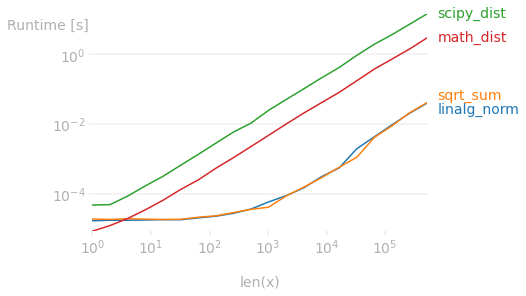

In [7]:
result.show()

# Manhattan Distance

In [5]:
from scipy.spatial.distance import cityblock, cdist

x = np.array([1,2,3])
y = np.array([4,5,6])
cityblock(x,y) #input must be 1D

9

In [6]:
n = 5
x = np.random.rand(n, 3)
y = np.random.rand(n, 3)
cdist(x,y, 'cityblock')#input must be 2D

array([[0.80695126, 0.17013092, 0.18714514, 1.23968003, 1.26418483],
       [0.70109565, 1.47617446, 1.53747008, 1.40932579, 1.53238124],
       [0.65580285, 1.23279821, 1.26025383, 1.39110164, 1.51415709],
       [1.5863305 , 1.73250236, 1.79379798, 0.52469478, 0.79483014],
       [1.03300673, 1.80808554, 1.86938116, 0.74349926, 0.57577316]])

# Minkowski Distance

In [7]:
from scipy.spatial import distance
x = np.array([1,2,3])
y = np.array([4,5,6])

print(distance.minkowski(x,y, 1))
print(distance.minkowski(x,y, 2))
print(distance.minkowski(x,y, 3))

9.0
5.196152422706632
4.3267487109222245


# Mahalanobis Distance

In [8]:
import numpy as np
from scipy.spatial.distance import cdist
n = 3
x = np.random.rand(n, 3)
y = np.random.rand(n, 3)
results =  cdist(x,y,'mahalanobis', VI = None)
print(results)
dist = np.diag(results)
print(dist)

[[1.6212784  2.91938905 2.02358908]
 [2.96293892 2.91663225 2.80381814]
 [2.26939714 1.99130273 2.70407497]]
[1.6212784  2.91663225 2.70407497]


# Similarity measure
 * Cosine Similarity
 * Jaccard Similarity
 

# Cosine Similarity

In [9]:
from scipy.spatial import distance
x = [1,2,3,4]
y = [8,7,6,5]
cos_sim = 1 - distance.cosine(x,y)
print(cos_sim)

0.8304547985373998


In [10]:
import numpy as np
x = [1,2,3,4]
y = [8,7,6,5]
cos_sim = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
print(cos_sim)

0.8304547985373996


In [11]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
x = np.array([1,2,3,4])
y = np.array([8,7,6,5])
cos_sim = cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] #make the input vector as 2D-vector
print(cos_sim)

0.8304547985373996


In [13]:
import numpy as np
import perfplot
from math import dist
from scipy.spatial import distance

def numpy_cos(data):
    a, b = data
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

def sklearn_cos(data):
    a, b = data
    return cosine_similarity(a.reshape(1,-1), b.reshape(1,-1))[0][0]

def scipy_cos(data):
    a, b = data
    return 1 - distance.cosine(a,b)

def setup(n):
    a = np.random.rand(n)
    b = np.random.rand(n)
    return np.array([a, b])

result = perfplot.bench(
    setup=setup,
    n_range=[2 ** k for k in range(20)],
    kernels=[numpy_cos, sklearn_cos, scipy_cos],
    xlabel="len(x)",
)

Output()

(1.4200000000000008e-05, 0.009913000000000002)


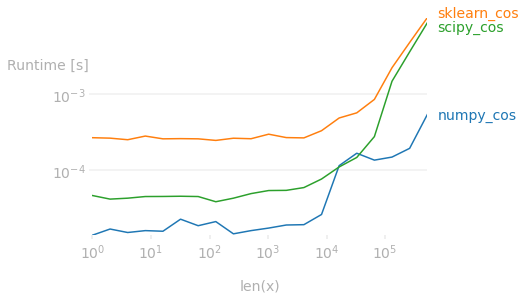

In [14]:
result.show()

# Jaccard Similarity

In [32]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

x = [0,1,2,3]
y = [1,0,0,1]
print(jaccard_similarity(x,y))

0.5